In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [4]:
datos_1 = pd.read_excel('intento_1.xlsx')
datos_2 = pd.read_excel('intento_2.xlsx')
datos_3 = pd.read_excel('intento_3.xlsx')
datos_4 = pd.read_excel('intento_4.xlsx')
datos_5 = pd.read_excel('intento_5.xlsx')
datos_6 = pd.read_excel('intento_6.xlsx')
datos_7 = pd.read_excel('intento_7.xlsx')
datos_8 = pd.read_excel('intento_8.xlsx')
datos_9 = pd.read_excel('intento_9.xlsx')

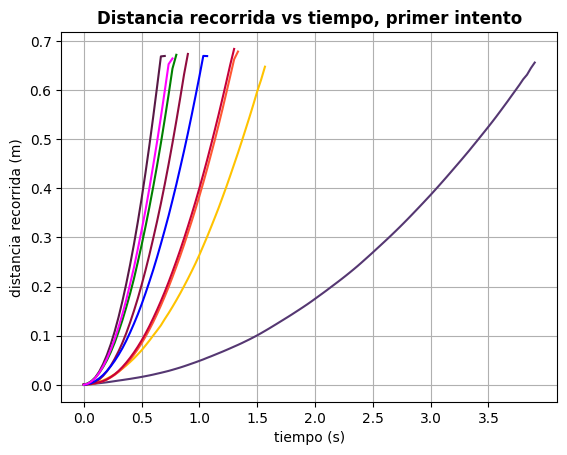

In [7]:
y_1 = datos_1['x']
x_1 = datos_1['t']
x_2 = datos_2['t']
y_2 = datos_2['x']
x_3 = datos_3['t']
y_3 = datos_3['x']
x_4 = datos_4['t']
y_4 = datos_4['x']
x_5 = datos_5['t']
y_5 = datos_5['x']
x_6 = datos_6['t']
y_6 = datos_6['x']
x_7 = datos_7['t']
y_7 = datos_7['x']
x_8 = datos_8['t']
y_8 = datos_8['x']
x_9 = datos_9['t']
y_9 = datos_9['x']
# rel_vectores
plt.title('Distancia recorrida vs tiempo, primer intento', fontsize=12, fontweight='bold')
plt.plot(x_1, y_1, color='#553772')
plt.plot(x_2, y_2, color='#FFC300')
plt.plot(x_3, y_3, color='#FF5733')
plt.plot(x_4, y_4, color='#C70039')
plt.plot(x_5, y_5, color='#900C3F')
plt.plot(x_6, y_6, color='#581845')
plt.plot(x_7, y_7, color='blue')
plt.plot(x_8, y_8, color='green')
plt.plot(x_9, y_9, color='magenta')
plt.xticks(np.arange(0, 4, 0.5))
plt.yticks(np.arange(0, 0.8, 0.1))
plt.xlabel('tiempo (s)')
plt.ylabel('distancia recorrida (m)')
# plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.savefig('relacion_vectores.png', dpi = 300, bbox_inches = 'tight')
plt.show()